# Spam E-mail Classifier 

## Import Packages

In [128]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string


## Loading Data

In [129]:
df = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding= "latin-1")
# Use this if using local data
# df = pd.read_csv("./dataset/spam.csv")

In [130]:
df.shape

(5572, 5)

In [131]:
# view the sample
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2252,ham,Den wat will e schedule b lk on sun?,NaN,NaN,NaN
568,ham,Love it! Daddy will make you scream with pleas...,NaN,NaN,NaN
4882,ham,"New Theory: Argument wins d SITUATION, but los...",NaN,NaN,NaN
470,spam,okmail: Dear Dave this is your final notice to...,NaN,NaN,NaN
2774,ham,"Dude u knw also telugu..thts gud..k, gud nyt..",NaN,NaN,NaN


## 1. Data Cleaning

In [132]:
# Dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


It shows that the there are very few data in last three unnamed columns. So, it makes sense to remove them and proceed forward only with the first two columns. 

In [133]:
# Let's drop the columns with NAN
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [134]:
df.shape

(5572, 2)

In [135]:
df.sample(5)

,v1,v2
1688,ham,Nan sonathaya soladha. Why boss?
5329,ham,"Sir, waiting for your letter."
1247,ham,Horrible gal. Me in sch doing some stuff. How ...
4306,ham,I guess it is useless calling u 4 something im...
3453,ham,I dont have any of your file in my bag..i was ...


In [136]:
# The features name v1 and v2 isn't that descriptive.
# So, let's rename them to what they represent. 
df.rename(columns={'v1': 'target', 'v2': 'message'}, inplace=True)

In [137]:
df.sample(3)

,target,message
995,ham,Change again... It's e one next to escalator...
5262,ham,Did you see that film:)
3714,ham,"I am late,so call you tomorrow morning.take ca..."


It looks good now. 

In [138]:
# Now, let's encode the target column into numerical representation.
encoder = LabelEncoder()

In [139]:
df['target'] = encoder.fit_transform(df['target'])

In [140]:
df.head(3)

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


Okay! Here's it is encoded to number representation. 

0 -> Ham (Not Spam)

1 -> Spam

In [141]:
# Check for missing values
df.isnull().sum()

target     0
message    0
dtype: int64

No entry in null. That's great:)

In [142]:
# Let's check for the duplicates now
df.duplicated().sum()

403

Turns out there are 403 duplicate entries. So, let's drop them. 

In [143]:
# drop the duplicates
df = df.drop_duplicates(keep='first')

In [144]:
# check again for duplicates
df.duplicated().sum()

0

So, all the duplicates are removed!

In [145]:
# The new shape?
df.shape

(5169, 2)

After dropping the duplicates, the number of messages has reduced from 5572 to 5162. 

## 2. EDA

In [146]:
sns.set_style("whitegrid")

### Check for the dataset distribution by target

In [147]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

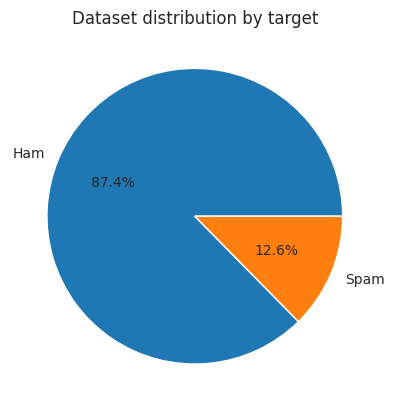

In [148]:
plt.pie(df['target'].value_counts(), labels=['Ham','Spam'],autopct='%1.1f%%')
plt.title('Dataset distribution by target')
plt.show()

As we can see throught the piechart, there is the very high difference between the spam and non-spam data. Thus, we can say our dataset in Imbalance Dataset and we can consider using some kind of resampling.

### Character and words count in message

In [149]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [150]:
# Calculating the number of characters in each message
df['message'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: message, Length: 5169, dtype: int64

In [151]:
# Add a new feature to the df representing character count in messge
df['character_count'] = df['message'].apply(len)

In [152]:
df.sample(3)

,target,message,character_count
1832,0,What time is ur flight tmr?,27
4039,0,I'm at home n ready...,22
558,0,Hi Princess! Thank you for the pics. You are v...,70


In [153]:
# Calculating the number of words in message
df['message'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy.., Availab...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: message, Length: 5169, dtype: object

In [154]:
df['message'].apply(lambda x: len(nltk.word_tokenize(x)))

0       23
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: message, Length: 5169, dtype: int64

In [155]:
# Add a new feature to the df representing words count in messge
df['message_len'] = df['message'].apply(lambda x: len(nltk.word_tokenize(x)))

In [156]:
df.sample(4)

,target,message,character_count,message_len
4440,0,I'm going 2 orchard now laready me reaching so...,61,14
4812,0,i can call in &lt;#&gt; min if thats ok,41,15
5118,0,Are you driving or training?,28,6
2443,0,&lt;#&gt; great loxahatchee xmas tree burning...,85,20


It looks good. We've added two new feature to your dataframe. 

In [157]:
# Statistics of overal df
df.describe()

,target,character_count,message_len
count,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.286129
std,0.332253,58.236293,13.226400
min,0.000000,2.000000,1.000000
25%,0.000000,36.000000,9.000000
50%,0.000000,60.000000,15.000000
75%,0.000000,117.000000,26.000000
max,1.000000,910.000000,219.000000


In [158]:
# View stats of ham messages
df[df['target']==0].describe()

,target,character_count,message_len
count,4516.0,4516.000000,4516.000000
mean,0.0,70.459256,16.957484
std,0.0,56.358207,13.394052
min,0.0,2.000000,1.000000
25%,0.0,34.000000,8.000000
50%,0.0,52.000000,13.000000
75%,0.0,90.000000,22.000000
max,0.0,910.000000,219.000000


In [159]:
# View stats of Spam messages
df[df['target']==1].describe()

,target,character_count,message_len
count,653.0,653.000000,653.000000
mean,1.0,137.891271,27.474732
std,0.0,30.137753,6.893007
min,1.0,13.000000,2.000000
25%,1.0,132.000000,25.000000
50%,1.0,149.000000,29.000000
75%,1.0,157.000000,32.000000
max,1.0,224.000000,44.000000


We can see, the mean characters in spam messages is 127 and that in ham is only 70.
Similarly, the mean value of words in ham messages is 17 and that for spam messages is 27. 
From this, we can conclude that the spam messages are generally lengthly than the non-spam messages. 


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Ham VS Spam Messages Character Count')

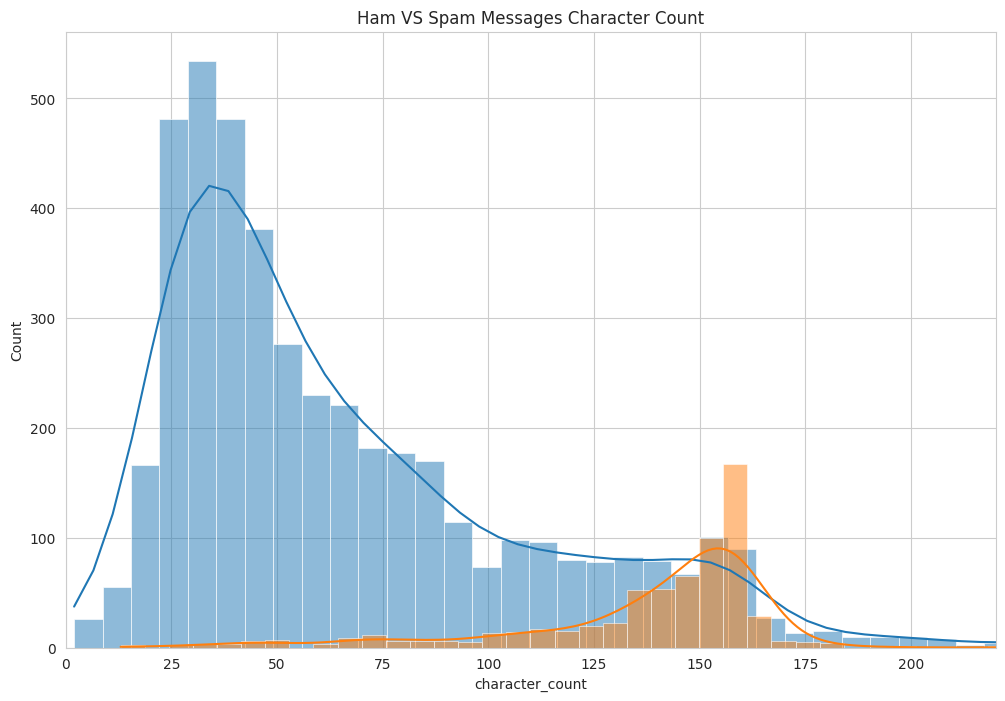

In [160]:
plt.figure(figsize=(12,8))
# Ham
sns.histplot(df[df['target']==0]['character_count'], kde=True)

# Spam
sns.histplot(df[df['target']==1]['character_count'], kde=True)
plt.xlim(0, 220)
plt.title("Ham VS Spam Messages Character Count")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Ham VS Spam Messages Words Count')

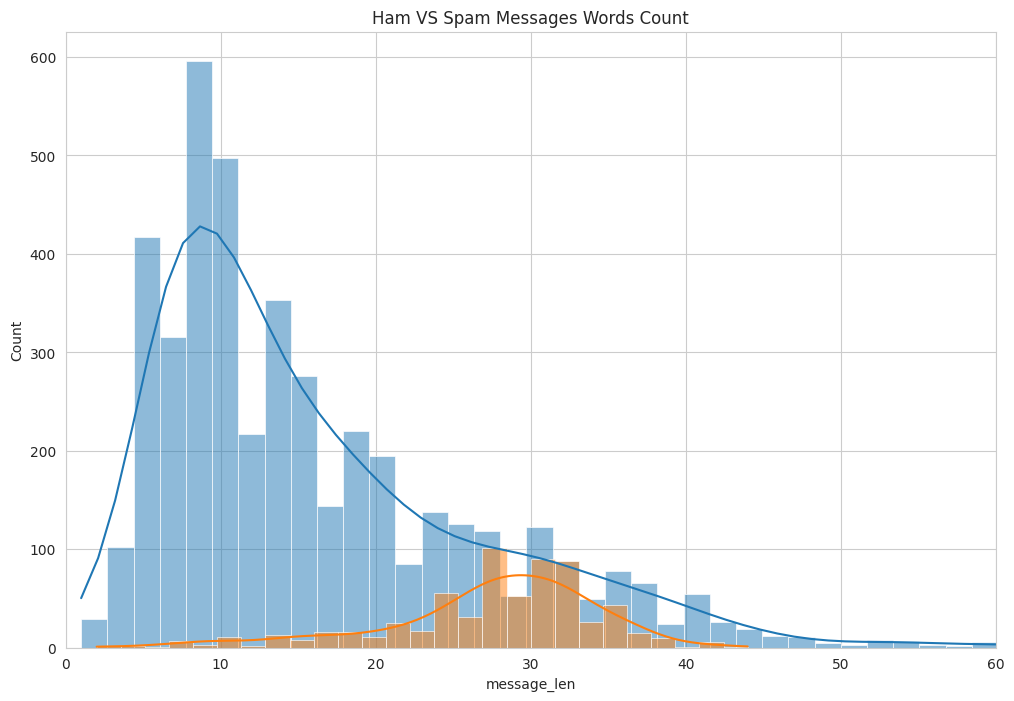

In [161]:
plt.figure(figsize=(12,8))
# Ham
sns.histplot(df[df['target']==0]['message_len'], kde=True)

# Spam
sns.histplot(df[df['target']==1]['message_len'], kde=True)
plt.xlim(0, 60)
plt.title("Ham VS Spam Messages Words Count")

From the figure, I see there are some outliers. They can affect our model. 

Though I've limited by x-axis range, they can be visualized by commenting out that line. 

In [162]:
### Correlation
numeric_df = df.select_dtypes(include=['number'])
numeric_df.corr()

,target,character_count,message_len
target,1.000000,0.384717,0.264198
character_count,0.384717,1.000000,0.965307
message_len,0.264198,0.965307,1.000000


<Axes: >

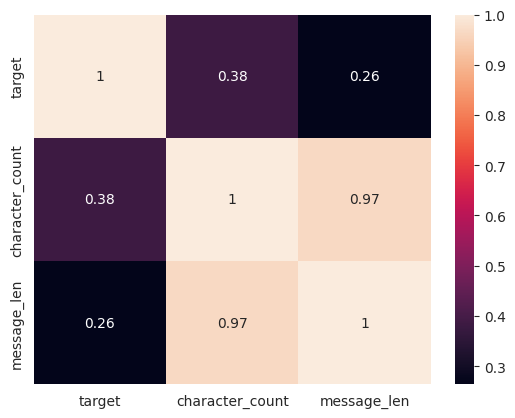

In [163]:
# Visualize the correlation using heatmap
sns.heatmap(numeric_df.corr(), annot=True)

We see, character_count and message_len have high correlation with each other (i.e. 0.97). 

So, there is multicollinearity in our data. Thus, we will only take one feature for our model. 

Since, character_count has higher correlation with target, we'll keep it and remove message_len. 

In [164]:
# remove the message_len column
df.drop(columns=['message_len'], inplace=True)

In [165]:
df.sample(4)

,target,message,character_count
1858,0,"Sir, i am waiting for your call.",32
5417,0,Nope. I just forgot. Will show next week,40
1159,0,Yun buying... But school got offer 2000 plus o...,52
5562,0,Ok lor... Sony ericsson salesman... I ask shuh...,96


## 3. Data Preprocessing

#### Clean the message

In [166]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    # remove html tags
    text = re.sub('<.*?>+', '', text)
    # lowercase the text
    text = str(text).lower()
    # remove text inside []
    text = re.sub('\[.*?\]', '', text)
    # remove links
    text = re.sub('https?://\S+|www\.\S+', '', text)
    # remove punctuations
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # remove 
    text = re.sub('\n', '', text)
    # remove the numbers
    text = re.sub(r'\d+', '', text)
    return text

In [167]:
# Let's add the message_clean column to df after applying clean_text function to original message
df['message_clean'] = df['message'].apply(clean_text)
df.head()

,target,message,character_count,message_clean
0,0,"Go until jurong point, crazy.. Available only ...",111,go until jurong point crazy available only in ...
1,0,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in a wkly comp to win fa cup final...
3,0,U dun say so early hor... U c already then say...,49,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah i dont think he goes to usf he lives aroun...


#### Stopwords removal

In [168]:
from nltk.corpus import stopwords

stop_words = stopwords.words("english")
custom_stopwords = ['c', 'u', 'hor', 'lar']
stop_words = stop_words + custom_stopwords

In [169]:
# stopword removal function
def remove_stopwords(text):
    words = text.split() 
    # Filter out stopwords
    filtered_text = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_text)
    

In [170]:
df['message_clean'] = df['message_clean'].apply(remove_stopwords)

In [171]:
df.sample(6)

,target,message,character_count,message_clean
3307,0,But i'm surprised she still can guess right lo...,50,im surprised still guess right lor
553,0,Ok. Every night take a warm bath drink a cup o...,138,ok every night take warm bath drink cup milk y...
2733,0,Do Ì_ noe if ben is going?,26,ì noe ben going
4992,0,\HEY KATE,9,hey kate
1450,0,Msg me when rajini comes.,25,msg rajini comes
4749,0,"If you're still up, maybe leave the credit car...",99,youre still maybe leave credit card get gas ge...


#### Stemming
Stemming is a text preprocessing technique in natural language processing (NLP) reducing inflected form of a word to one so-called “stem,” or root form.


In [172]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
print(ps.stem("lovely"))
print(ps.stem("wondering"))

love
wonder


In [173]:
# function for stemming
def stemming(text):
    text = ' '.join(ps.stem(word) for word in text.split(' '))
    return text

In [174]:
df['message_clean'] = df['message_clean'].apply(stemming)

In [175]:
df.sample(4)

,target,message,character_count,message_clean
4601,0,\Hey j! r u feeling any better,30,hey j r feel better
235,0,I have printed it oh. So &lt;#&gt; come upst...,50,print oh ltgt come upstair
5564,0,Why don't you wait 'til at least wednesday to ...,67,dont wait til least wednesday see get
2140,0,After the drug she will be able to eat.,39,drug abl eat


In [176]:
# All preprocessing at one place
def preprocess(text):
    text = clean_text(text)
    text = remove_stopwords(text)
    text = stemming(text)
    return text

# use if not transformed already...

## 4. Visualization

#### Word Cloud Formation

In [177]:
from wordcloud import WordCloud

wc = WordCloud(background_color='white')

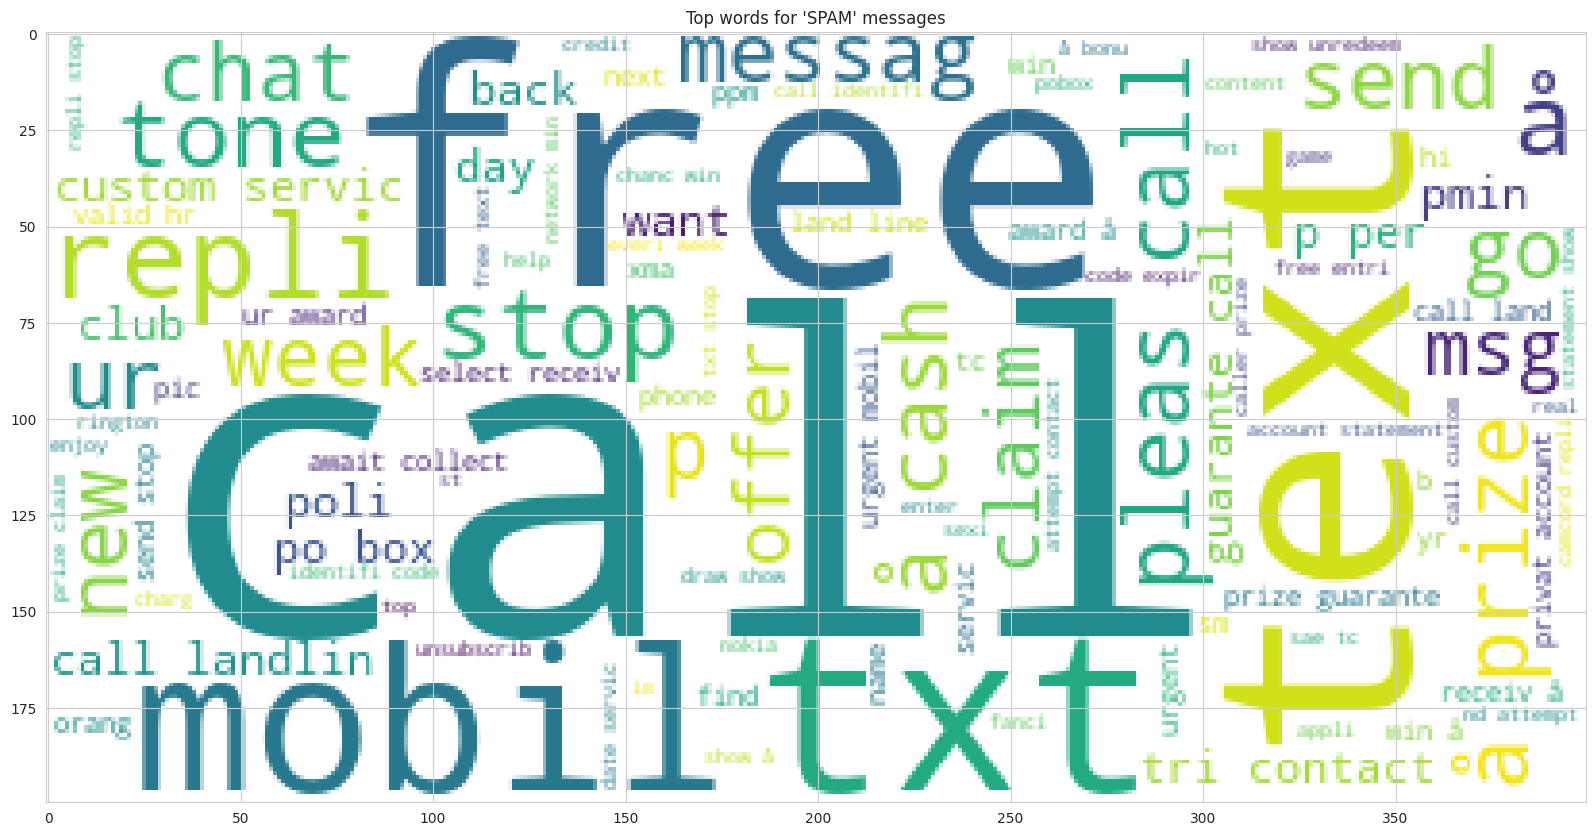

In [178]:
# Generate word cloud for spam message
spam_wc = wc.generate(df[df['target'] == 1]['message_clean'].str.cat(sep=" "))
plt.figure(figsize=(20,10))
plt.title("Top words for 'SPAM' messages")
plt.imshow(spam_wc)

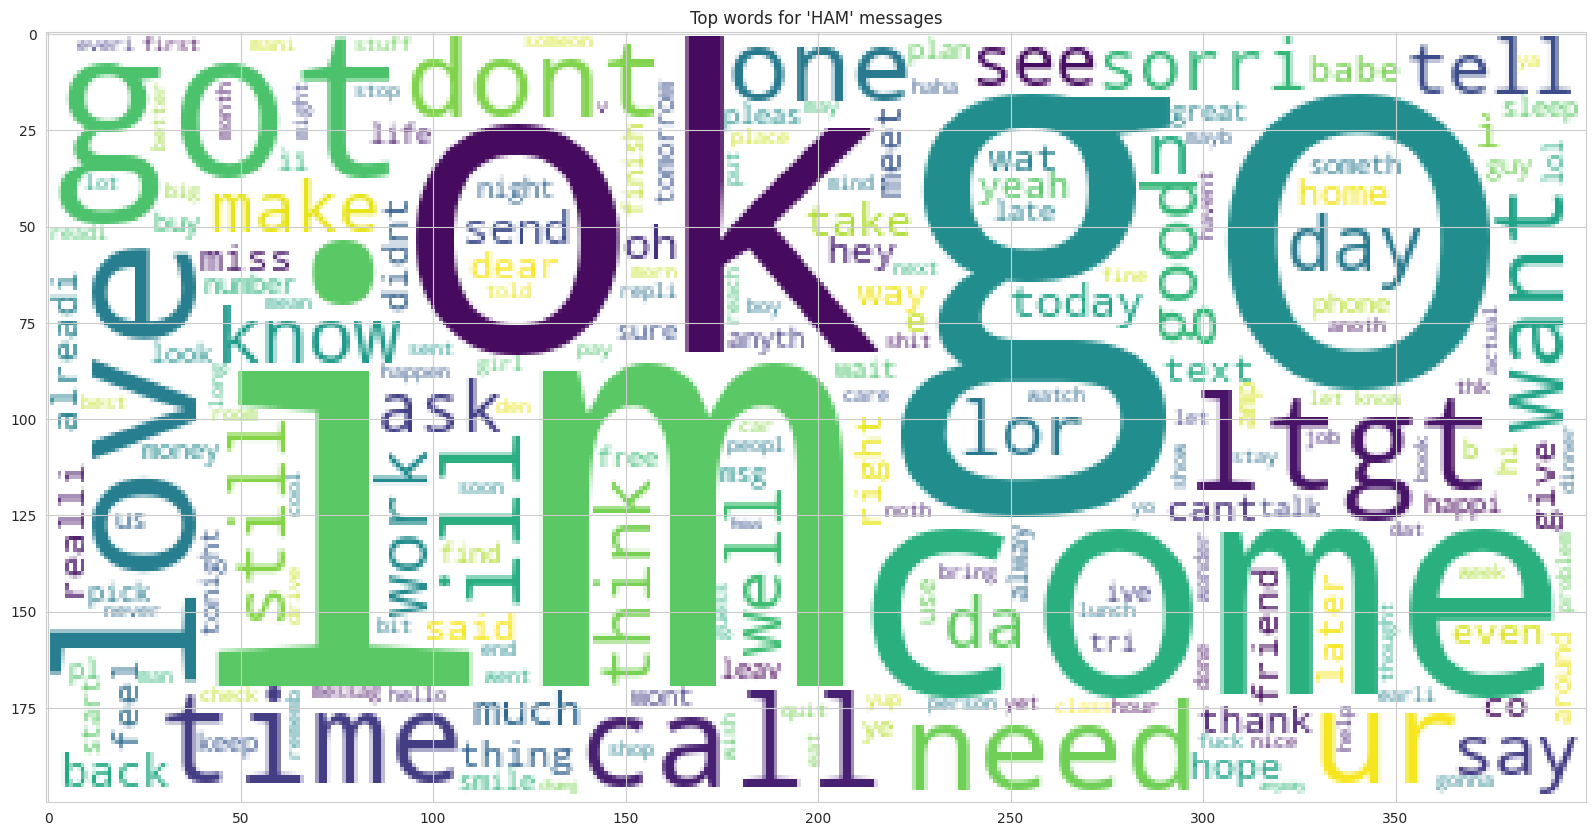

In [179]:
# Generate word cloud for ham message
ham_wc = wc.generate(df[df['target'] == 0]['message_clean'].str.cat(sep=" "))
plt.figure(figsize=(20,10))
plt.title("Top words for 'HAM' messages")
plt.imshow(ham_wc)

#### Top 'n' words frequency barplot

In [180]:
def build_corpus(df, target):
    """
    Build a corpus of words from messages in a DataFrame based on the target label.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the messages and their corresponding targets.
    target (int): The target label (1 for spam, 0 for ham).
    
    Returns:
    list: A list of words from the messages corresponding to the specified target label.
    """
    corpus = []
    for msg in df[df['target'] == target]['message_clean'].tolist():
        for word in msg.split():
            corpus.append(word)
    return corpus

In [181]:
spam_corpus = build_corpus(df, target=1)

In [182]:
len(spam_corpus)

9193

So, there are roughly 9K words across all the spam messages in our dataset. 

In [183]:
from collections import Counter

# Counter will create dictionary including all the words with their frequency
spam_counter = Counter(spam_corpus)

In [184]:
# See top 'n' words in the corpus
spam_counter.most_common(20)

[('call', 323),
 ('å£', 222),
 ('free', 190),
 ('txt', 137),
 ('text', 122),
 ('ur', 119),
 ('mobil', 115),
 ('stop', 106),
 ('repli', 101),
 ('claim', 98),
 ('prize', 82),
 ('get', 73),
 ('new', 64),
 ('servic', 64),
 ('p', 63),
 ('tone', 62),
 ('nokia', 60),
 ('send', 59),
 ('urgent', 58),
 ('contact', 56)]

These are the words which we also see in the wordcloud.

In [185]:
def visualize_top_words(counter, n=30):
    """
    Visualize the top 'n' most common words using a bar plot.
    
    Parameters:
    counter (Counter): A Counter object containing word frequencies.
    n (int): The number of top words to visualize.
    """
    # Create a DataFrame from the Counter object
    top_words_df = pd.DataFrame(counter.most_common(n), columns=['Word', 'Frequency'])

    # Create a bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Word', y='Frequency', data=top_words_df)
    plt.xticks(rotation='vertical')
    plt.title(f'Top {n} Most Common Words in Spam Messages')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()

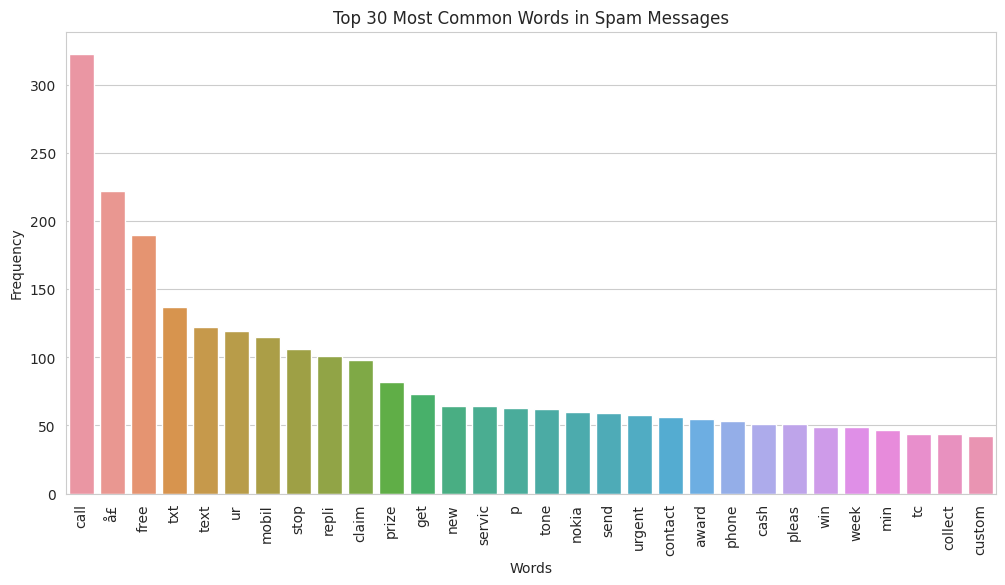

In [186]:
# Visualize top spam words with barplot
visualize_top_words(spam_counter)

In [187]:
ham_corpus = build_corpus(df, target=0)

In [188]:
# Size of ham corpus
len(ham_corpus)

35180

In [189]:
# Count the frequency of words in the given corpus
ham_counter = Counter(ham_corpus)
# See top 'n' words in the corpus
ham_counter.most_common(20)

[('im', 437),
 ('go', 403),
 ('get', 354),
 ('come', 272),
 ('ltgt', 254),
 ('ok', 246),
 ('dont', 242),
 ('like', 232),
 ('know', 232),
 ('call', 232),
 ('got', 226),
 ('time', 212),
 ('love', 211),
 ('want', 208),
 ('ill', 206),
 ('good', 206),
 ('ur', 197),
 ('day', 197),
 ('need', 171),
 ('one', 163)]

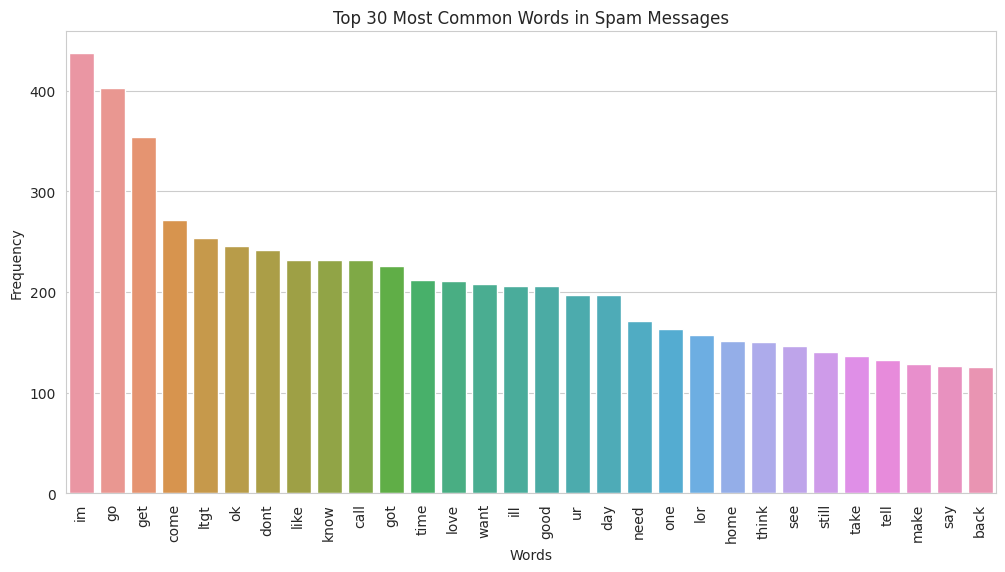

In [190]:
# Visualize with barplot
visualize_top_words(ham_counter)

## 5. Vectorization

In [191]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()
# tfidf = TfidfVectorizer() # First experimented with this
tfidf = TfidfVectorizer(max_features= 3000) 


In [192]:
X = cv.fit_transform(df['message_clean']).toarray()

In [193]:
X.shape

(5169, 7046)

In [194]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [195]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [196]:
len(y)

5169

In [197]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)


## 6. Model Building

In [198]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

### 6.1 Gaussian Naive Bayes

In [199]:
# Model formation
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

GaussianNB()

In [200]:
# Make prediction using model
y_pred_gnb = gnb.predict(X_test)

In [201]:
def plot_confusion_matrix(y_true, y_pred, class_names):
    """
    Plot the confusion matrix.
    
    Parameters:
    y_true (array-like): True labels.
    y_pred (array-like): Predicted labels.
    class_names (list): List of class names.
    """
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [202]:
def evaluate_model(y_true, y_pred, class_names):
    """
    Evaluate the model by calculating accuracy, precision, and confusion matrix, 
    and visualize the confusion matrix.

    Parameters:
    y_true (array-like): True labels.
    y_pred (array-like): Predicted labels.
    class_names (list): List of class names.
    """
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    confusion = confusion_matrix(y_true, y_pred)

    # Print metrics
    print(f"Accuracy Score: {accuracy * 100:.2f}%")  
    print(f"Precision Score: {precision * 100:.2f}%") 
    print("Confusion Matrix:\n", confusion)
    
    # Plot confusion matrix
    plot_confusion_matrix(y_true, y_pred, class_names)

In [203]:
# Defining our class names
class_names = ['Ham', 'Spam']

Accuracy Score: 86.75%
Precision Score: 51.67%
Confusion Matrix:
 [[773 116]
 [ 21 124]]


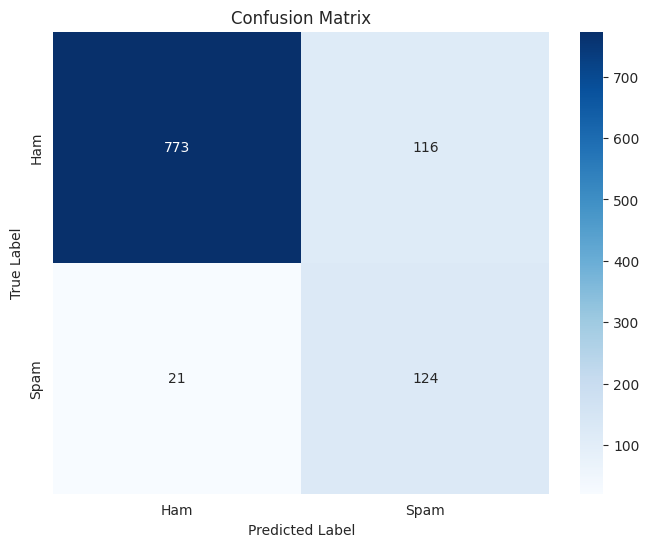

In [204]:
# Evaluate our model
evaluate_model(y_test, y_pred_gnb, class_names)

The accuracy with 86% is somewhat good, but the precision is very low.

For the tasks like Spam SMS classification, **we need very** **high value of precision**. So, this model is performing very bad compared to our need. 

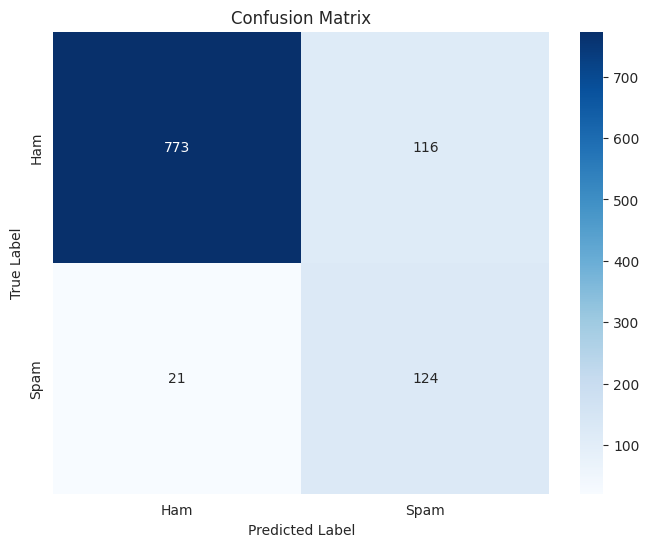

In [205]:
# Visualizing Confusion Matrix
class_names = ['Ham', 'Spam']  # Replace with your class names
plot_confusion_matrix(y_test, y_pred_gnb, class_names)

As seen from the plot, the spam message is poorly classified by our model. 

### 6.2 Multinomial Naive Bayes

In [206]:
# Model formation
mnb = MultinomialNB()

# Train the model
mnb.fit(X_train, y_train)

MultinomialNB()

In [207]:
# Make prediction using model
y_pred_mnb = mnb.predict(X_test)

Accuracy Score: 96.71%
Precision Score: 85.35%
Confusion Matrix:
 [[866  23]
 [ 11 134]]


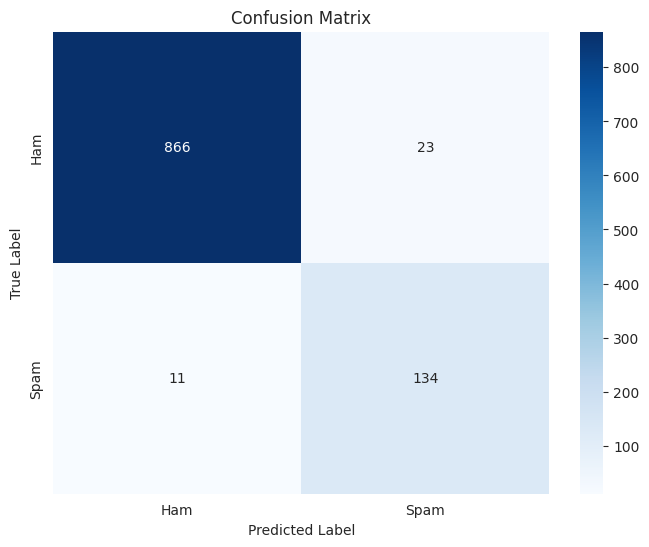

In [208]:
# Evaluate our model
evaluate_model(y_test, y_pred_mnb, class_names)

This one is performing better than the Gaussian Naive Bayes, with high accuray of 96%. Though the precision has increased to 85%, it is still relatively low. 

### 6.3 Bernoulli Naive Bayes

In [209]:
# Model formation
bnb = BernoulliNB()

# Train the model
bnb.fit(X_train, y_train)

BernoulliNB()

In [210]:
# Make prediction using model
y_pred_bnb = bnb.predict(X_test)

Accuracy Score: 96.42%
Precision Score: 95.00%
Confusion Matrix:
 [[883   6]
 [ 31 114]]


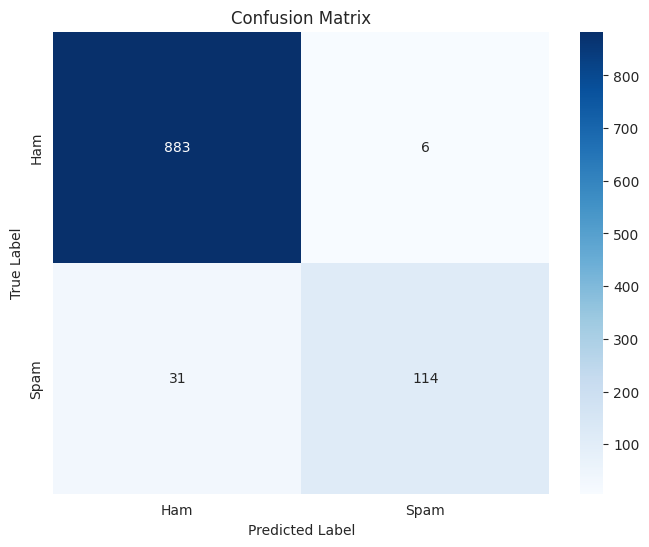

In [211]:
# Evaluate our model
evaluate_model(y_test, y_pred_bnb, class_names)

This one does have the better accuracy score and precision score, compared to the earlier to models. 

## Model Building With Tf-Idf Vectorizer
Just now, we tried building three naive bayes models using countVectorizer. 

Now, let's try building the exactly same models using TfidfVectorizer. 

In [212]:
X = tfidf.fit_transform(df['message_clean']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [213]:
X.shape

(5169, 3000)

In [214]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [215]:
len(y)

5169

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

### 6.4 Gaussian Naive Bayes

In [217]:
# Model formation
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

GaussianNB()

In [218]:
# Make prediction using model
y_pred_gnb = gnb.predict(X_test)

Accuracy Score: 86.27%
Precision Score: 50.64%
Confusion Matrix:
 [[773 116]
 [ 26 119]]


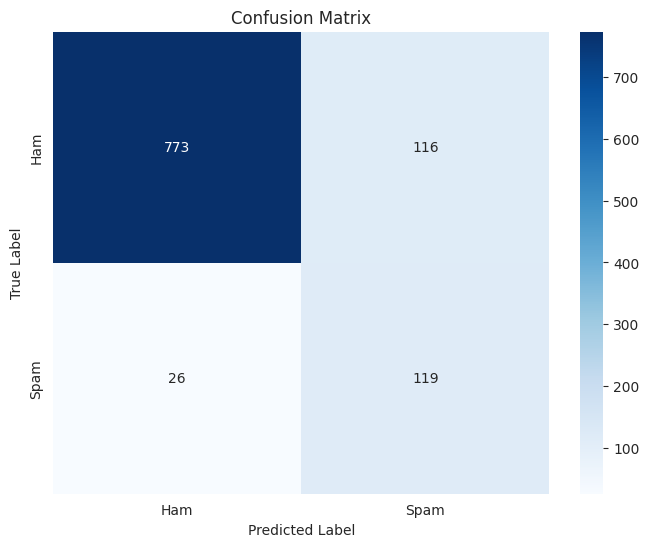

In [219]:
# Evaluate our model
evaluate_model(y_test, y_pred_gnb, class_names)

Precision has reduced in this model. 

### 6.5 Multinomial Naive Bayes

In [220]:
# Model formation
mnb = MultinomialNB()

# Train the model
mnb.fit(X_train, y_train)

MultinomialNB()

In [221]:
# Make prediction using model
y_pred_mnb = mnb.predict(X_test)

Accuracy Score: 97.49%
Precision Score: 100.00%
Confusion Matrix:
 [[889   0]
 [ 26 119]]


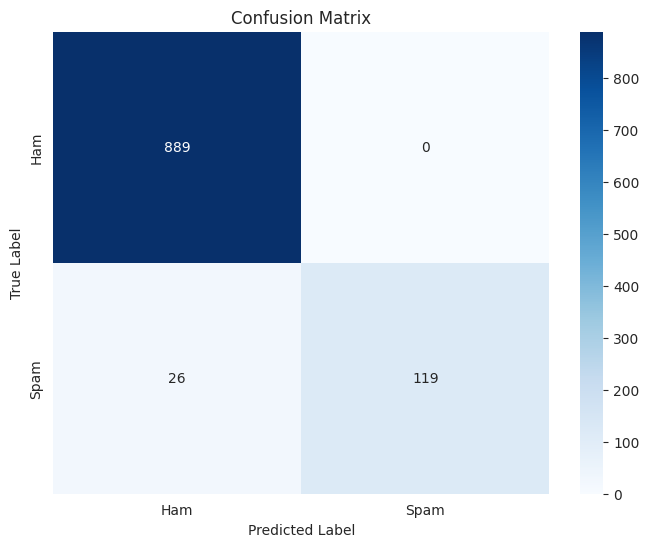

In [222]:
# Evaluate our model
evaluate_model(y_test, y_pred_mnb, class_names)

It demonstrates high accuracy score of 96% with perfect precision of 100%. 

Since, we need high precision model I'll proceed with this one. 

### 6.6 Bernoulli Naive Bayes

In [223]:
# Model formation
bnb = BernoulliNB()

# Train the model
bnb.fit(X_train, y_train)

BernoulliNB()

In [224]:
# Make prediction using model
y_pred_bnb = bnb.predict(X_test)

Accuracy Score: 97.68%
Precision Score: 98.40%
Confusion Matrix:
 [[887   2]
 [ 22 123]]


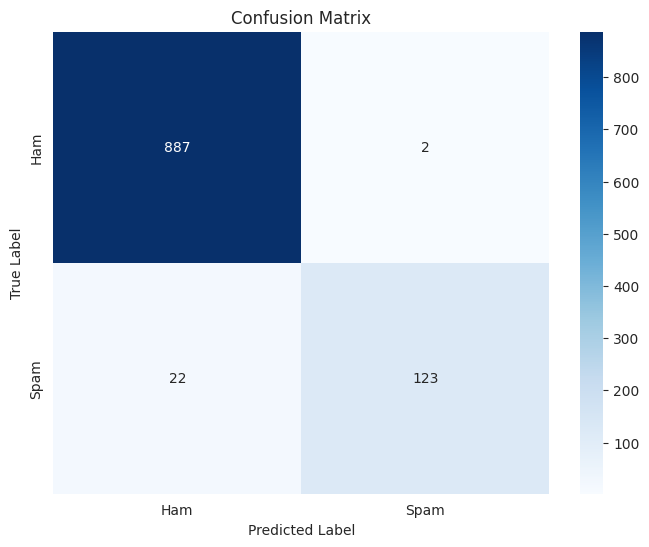

In [225]:
# Evaluate our model
evaluate_model(y_test, y_pred_bnb, class_names)

### 6.7 Testing with more Models

In [226]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [227]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [228]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'GBDT':gbdt,
    'xgb':xgb
}

In [229]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [230]:
# Let's see for SVC
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9738878143133463, 0.9402985074626866)

In [231]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
#     print("For ",name)
#     print("Accuracy - ",current_accuracy)
#     print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [232]:
# Dataframe of model performance
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

performance_df

,Algorithm,Accuracy,Precision
1,KN,0.915861,1.000000
2,NB,0.974855,1.000000
5,RF,0.970019,0.991379
7,xgb,0.967118,0.944000
0,SVC,0.973888,0.940299
6,GBDT,0.944874,0.940000
4,LR,0.944874,0.879310
3,DT,0.938104,0.871560


We can see that **Random Forest and Naive Bayes are best performing models.** 

Since, Naive Bayes has 100% precision over 99% precision of Random Forest, it's better to go with Naive Bayes. 

In [243]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.915861,1.000000,0.915861,1.000000
1,NB,0.974855,1.000000,0.974855,1.000000
2,RF,0.970019,0.991379,0.970019,0.991379
3,xgb,0.967118,0.944000,0.967118,0.944000
4,SVC,0.973888,0.940299,0.973888,0.940299
5,GBDT,0.944874,0.940000,0.944874,0.940000
6,LR,0.944874,0.879310,0.944874,0.879310
7,DT,0.938104,0.871560,0.938104,0.871560



If we observe the above df, the accuracy of NB has actually improved this time maintaining the 100% accuracy. 

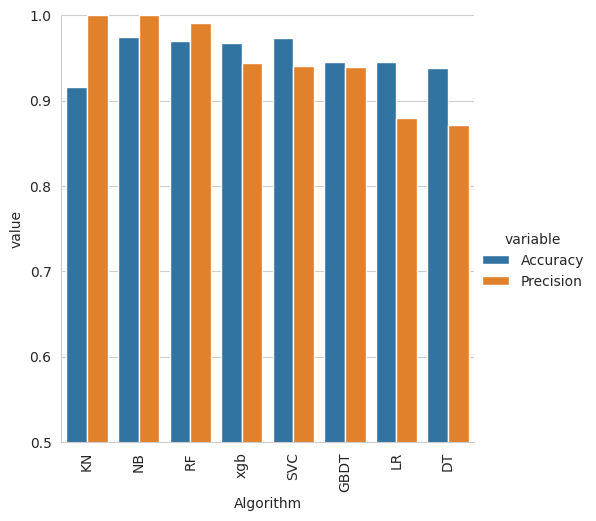

In [234]:
# Visualizing model accuracy and precision through bargraph

sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

### 6.8 Voting Classifier
Let's take our best performing models and use voting classifier on top of it

In [247]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
rfc = RandomForestClassifier()

In [249]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('rfc', rfc)],voting='soft')
# Train the model
voting.fit(X_train,y_train)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('rfc', RandomForestClassifier())],
                 voting='soft')

In [250]:
# Make prediction
y_pred = voting.predict(X_test)

Accuracy Score: 97.97%
Precision Score: 98.44%
Confusion Matrix:
 [[887   2]
 [ 19 126]]


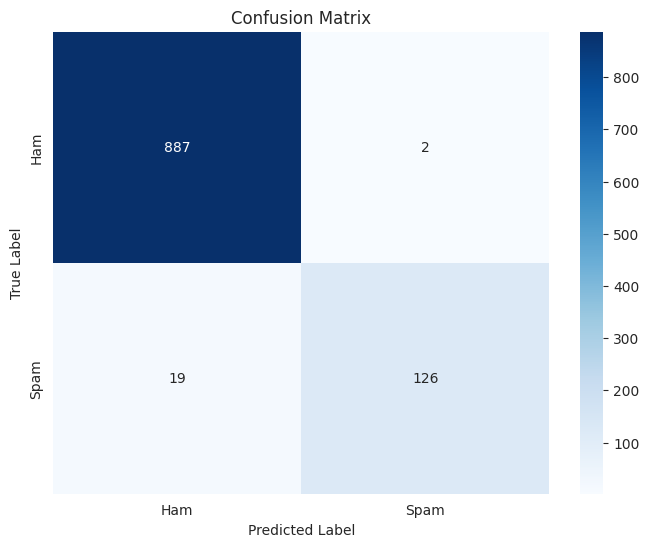

In [251]:
# Evaluate our model
evaluate_model(y_test, y_pred, class_names)

It has a good accuracy and precision. Yet, the **Naive Bayes model is performing better** than it.

So, **we are not using this model**. 

## Save the model 

In [253]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [269]:
!zip -r file.zip /kaggle/working
from IPython.display import FileLink
FileLink(r'file.zip')

  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/vectorizer.zip (stored 0%)
  adding: kaggle/working/vectorizer.pkl (deflated 71%)
  adding: kaggle/working/model.pkl (deflated 14%)
  adding: kaggle/working/.virtual_documents/ (stored 0%)
  adding: kaggle/working/my_files.zip (stored 0%)


/kaggle/working/file.zip